-----
<div> <center> ESPACIO PARA BANNER DE LA MAESTRIA </center> </div>   

-----

# Análisis de Puntos Calientes: Estimación de Densidades. Fundamentos Teóricos.

Este *cuaderno* trata el algoritmo DBSCAN. Este algoritmo es otra de las posibles formas de clustering o agrupamiento de datos. El objetivo del *cuaderno* es que usted aprenda el algoritmo, que sea capaz de reconocer sus características y funcionamiento, y de cómo implementarlo.


**NO** es necesario editar el archivo o hacer una entrega. Sin embargo, los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

## Introducción

Anteriormente, exploramos el análisis de la canasta de compra. Recordemos que el análisis de la canasta de compra es un algoritmo que busca comprender las relaciones entre todos los artículos y los grupos de artículos obtenidos de los datos de una transacción. Luego, estas relaciones nos sirven para optimizar los diseños de las tiendas, ordenar con mayor precisión el inventario y ajustar los precios, sin reducir el número de artículos en cada transacción. En este cuaderno vamos a cambiar la dirección y explorar los modelos de puntos calientes. 

Pensemos un escenario imaginario donde una nueva enfermedad empieza a dispersarse por varias comunidades del país, y el gobierno quiere saber cómo enfrentar esta emergencia sanitaria. Para poder enfrentar esta emergencia sanitaria, es muy importante tener un buen conocimiento epidemiológico de dónde se encuentran los casos y cómo se mueve la enfermedad. El poder localizar y cuantificar las áreas problemáticas, conocidas como puntos calientes, le permiten tanto a los formuladores de políticas como los profesionales de salud elaborar estrategias  eficientes para combatir la enfermedad. Este escenario comprende una de los tantas aplicaciones de los modelos de puntos calientes.

Los modelos de punto caliente se utilizan para identificar cómo se distribuye una población en un área geográfica dada; por ejemplo, cómo l se extiende por todo el país la población de individuos infectados con la enfermedad que mencionamos antes. Podemos crear esta distribución dependiendo de la disponibilidad de datos de muestra representativos.  Debemos tener en cuenta que la población puede referirse a  cualquier cosa definible en términos geográficos, lo que incluye, pero no se limita a, crimen, individuos infectados con enfermedades, personas con ciertas características demográficas, o huracanes:

El análisis de puntos de puntos calientes muy popular debido a que resulta muy fácil  visualizar e interpretar los resultados. Ya san los periódicos, los sitios web, blogs o programas de televisión, todos aprovechan el análisis de puntos calientes para respaldar los argumentos, capítulos y temas incluidos en o sobre ellos. Aunque no es tan conocido como la maquinaria de modelos de aprendizaje, el principal algoritmo de análisis de puntos calientes, conocido como estimación de densidad de kernel, es posiblemente una de las técnicas analíticas más utilizadas. Por ejemplo, nosotros incluso realizamos  diariamente estimaciones de la densidad de kernel mentalmente sin saberlo. La estimación de densidad de kernel es una técnica de análisis de puntos calientes que se utiliza para estimar la verdadera distribución de la población de eventos geográficos específicos. Antes de entrar en el algoritmo en sí, debemos hacer una revisión de estadística espacial y de las funciones de probabilidad de densidad. 

## Estadística Espacial

La estadística espacial es la rama de la estadística que se enfoca en el análisis de datos con propiedades espaciales, dentro de esto encontramos a las coordenadas geográficas o topológicas. Se parece al análisis de series de tiempo en el punto en que el objetivo es analizar datos que cambian a lo largo de alguna dimensión. En el análisis de series de tiempo, los datos cambian a través de la dimensión del tiempo; mientras que en la estadística espacial, los datos cambian a lo largo de la dimensión espacial. Hay una serie de técnicas que se incluyen en el paraguas de estadísticas espaciales, pero en este cuaderno nos enfocaremos en la técnica de estimación de densidad de kernel. Al igual que con la mayoría de los análisis estadísticos, en estadística espacial, se trata de tomar muestras de datos geográficos y utilizarlos para generar conocimientos y hacer predicciones. Por ejemplo, la estadística espacial se utiliza mucho para analizar los terremotos. Al recopilar datos de ubicación de terremotos, podemos generar mapas con áreas de alta y baja probabilidad de terremotos, y así ayudar a los especialistas a determinar dónde es probable que ocurran futuros terremotos y  a su vez, qué esperar en términos de intensidad.



## Funciones de Densidad  De Probabilidad 


Para la estimación de densidad de kernel utilizaremos la idea de la función de densidad de probabilidad (PDF, por sus siglas en inglés), que es uno de los conceptos fundamentales en estadística. La función de densidad de probabilidad describe el comportamiento de una variable aleatoria continua. Es decir, expresa la verosimilitud o probabilidad de que la variable aleatoria tome algún rango de valores. Por ejemplo, consideremos las estaturas de los hombres en los Estados Unidos; usando la función de probabilidad de densidad de dichas las alturas, podríamos calcular la probabilidad de que algún hombre radicado en Estados Unidos sea entre 1,9 y 1,95 metros de altura.

Posiblemente la función de densidad más popular en estadística es la distribución normal estándar, que es simplemente la distribución normal centrada en cero con un estándar
desviación igual a uno.

Normalmente, en lugar de la función de densidad, los estadísticos o los científicos de datos tenemos disponible valores de muestra recolectados aleatoriamente provenientes de una población cuya distribución se desconoce. Aquí es donde usaremos  la estimación de densidad de kernel ya que nos permite estimar la función de densidad de probabilidad desconocida de una variable aleatoria utilizando datos muestrales. En la siguiente figura podemos ver representado un ejemplo simple, pero más razonable de una distribución que nos gustaría estimar con estimación de densidad de kernel. Tomemos cierto número de observaciones (puntos de datos muestrales) y usemos esas observaciones para crear una distribución suave que imite la verdadera distribución subyacente que desconocemos. 



## Uso de Análisis de Puntos Calientes en los Negocios

Ya mencionamos algunas de las formas en que los modelos de puntos caliente pueden  impactar significativamente en la industria. Tanto las organizaciones de la salud como los medios de comunicación suelen utilizar el análisis de puntos calientes para comunicar dónde se localizan las enfermedades y la probabilidad de contraerlas según la ubicación geográfica. Gracias al análisis de puntos caliente, podemos computar y distribuir de forma confiable esta información. El análisis de puntos calientes es excelente para tratar datos de salud porque las visualizaciones son muy sencillas. Esto significa que las posibilidades de que los datos se malinterpreten, ya sea intencionalmente o no, son relativamente bajas.

También podemos utilizarlo para predecir dónde es probable que ocurran ciertos eventos geográficos. La ciencias ambientales, como el  estudio de los desastres naturales y los fenómenos meteorológicos extremos utilizan aprovechan las capacidades predictivas de
análisis de puntos calientes. Por ejemplo, los terremotos son difíciles de predecir, porque el tiempo entre uno y otro puede ser muy grande, y la maquinaria necesaria para poder rastrearlos y medirlos para hacer estas predicciones es relativamente nueva.

Cuando pensamos en términos de política pública y el uso de recursos, el análisis de puntos calientes puede tener un alto impacto en el análisis demográfico de la población. Determinar a dónde deben ir los recursos, tanto monetarios como de personal, puede ser desafiante. Sin embargo, dado que los recursos suelen ser específicos demográficos, podemos usar el  análisis de puntos calientes para determinar la distribución de ciertas características demográficas. Entendemos que, como características demográficas, podemos encontrar la distribución geográfica de los graduados de secundaria, inmigrantes de un región global específica, o individuos que ganan $100,000 o más al año.

Hasta ahora sólo discutimos tres aplicaciones de modelos de análisis de puntos calientes, pero podemos ver que sus aplicaciones son infinitas.


## Estimación de Densidad Kernel
En estadística, la Estimación de Densidad Kernel es una forma no paramétrica de estimar la función de densidad de probabilidad de una variable aleatoria. La estimación de la densidad del kernel es un problema fundamental de suavización de datos en el que se hacen inferencias sobre la población, basándose en una muestra de datos finita.

La idea detrás de este método es contar el número de puntos de forma continua. En lugar de utilizar un recuento discreto, en el que se incluye un punto en el recuento si se encuentra dentro de un determinado límite y se ignora en caso contrario, se utilizan funciones (kernels) que incluyen los puntos pero dan diferentes pesos a cada uno de ellos dependiendo de la distancia a la que se encuentre el punto que estamos contando.

Formalmente, podríamos definir el método de la siguiente manera: sean $(x_1, x_2, \cdots, x_n)$ muestras independientes e idénticamente distribuidas extraídas de alguna distribución univariada con una densidad desconocida $f$ en cualquier punto dado $x$. Nos interesa estimar la forma de esta función $f$. Su estimador de la densidad del kernel es:

$$\hat{f_h}(x)=\frac{1}{n}\sum_{i=1}^n K_h(x-x_i)=\frac{1}{nh}\sum_{i=1}^nK\left(\frac{x-x_i}{h}\right)$$

Donde $K$ es una función no negativa llamada kernel y $h > 0$ es un parámetro de suavización llamado ancho de banda. Un kernel con el subíndice $h$ ($K_h$) se denomina kernel escalado y se define como $K_h(x) = 1/h K(x/h)$. Intuitivamente, se busca elegir $h$ tan pequeño como los datos lo permitan; sin embargo, existe un trade-off entre sesgo y varianza del estimador. 

En la literatura se suelen utilizar diferentes funciones kernel: uniforme, triangular, bi-peso, tri-peso, Epanechnikov, normal, entre otras. Se puede probar que el kernel de Epanechnikov es óptimo en un sentido de error cuadrático medio, aunque en la práctica la escogencia del tipo de función Kernel entre las opciones listadas anteriores no afecta de manera relevante los resultados. Adicionalmente, debido a sus convenientes propiedades matemáticas, a menudo se utiliza el kernel normal, que significa $K(x) = \phi(x)$, donde $\phi$ es la función de densidad normal estándar.

Típicamente la función kernel exhibe las siguientes propiedades:
1. Simetría: $K(u)=K(-u)$.
2. Normalizada de modo que $\int_{-\infty}^\infty K(u) du = 1$.
3. Monótona decreciente tal que $K'(u)<0$ cuando $u>0$.
4. Valor esperado igual a 0: $E[K]=0$.

## Estimacion de Densidades de Kernel

La estimación de densidad de kernel es uno de los principales enfoques metodológicos para el análisis de puntos calientes. Esta genera una densidad estimada utilizando datos de muestra y dos parámetros conocidos como la función kernel y el ancho de banda. La densidad estimada es, como cualquier distribución, básicamente una guía del comportamiento de una variable aleatoria. Así, nos referimos a la frecuencia con la que la variable aleatoria toma cualquier valor específico, {\ x_1,\ \ldots.,\ x_n}. Cuando los datos son típicamente geográficos en el análisis de puntos calientes , la densidad estimada responde a la pregunta: ¿Cuál es la frecuencia  en que pares específicos de longitud y latitud aparecen para un evento dado? Si un par de longitudes y de latitudes específicas {x_{longitude},\ x_{latitude}} y otros pares cercanos ocurren con alta frecuencia; entonces la densidad estimada con los datos de la muestra nos va a mostrar que el área alrededor del par de longitudes y de latitudes mencionados anteriormente ocurren con alta probabilidad. La estimación de densidad de kernel se conoce como algoritmo suavizado porque una curva se dibuja sobre los datos de la muestra, que, si los datos pertenecen a una muestra representativa, puede ser una buena estimación de la verdadera función de densidad de la población. Dicho de otra manera, la estimación de densidad de kernel tiene como objetivo eliminar el ruido inherente a los datos muestreados, pero que no es una característica de la población total. La única suposición del modelo es que los datos realmente pertenecen a una densidad interpretable y significativa a partir de la cual podemos derivar conocimientos y actuar consecuentemente. Es decir que existe una verdadera distribución subyacente. Suponemos que los datos de la muestra contienen clusters de datos y que estos clusters se alinean con regiones de alta probabilidad en la verdadera población. Un beneficio de crear una estimación de calidad de la verdadera densidad de población es que la densidad estimada se puede usar para muestrear más datos de la población.

Luego de esta breve introducción, seguro tenemos las siguientes preguntas:

• ¿Cuál es el ancho de banda?
• ¿Qué es la función de kernel?

Responderemos a estas dos preguntas a continuación.


### El Ancho de Banda 	

El parámetro más importante en la estimación de densidad de kernel se llama ancho de banda, y no debemos sobreestimar su impacto en la calidad de la estimación ya que es valor que determina el grado de suavidad. 

Si el ancho de banda es bajo, la densidad estimada tendrá un suavizado limitado, lo que quiere decir que la densidad va a capturar todo el ruido de los datos de la muestra. Por el contrario, si el ancho de banda es alto, la densidad estimada será muy suave. Una densidad demasiado suave eliminará características de la densidad real desde la densidad estimada, que son legítimas y no ruidosas.

En un lenguaje más estadístico, el parámetro de ancho de banda controla la compensación de la varianza de sesgo. Es decir, la varianza alta es el resultado de valores bajos de ancho de banda porque la densidad es sensible a la variación de los datos de la muestra. Los valores bajos de ancho de banda limitan la capacidad que el modelo pudo haber tenido para adaptarse y solucionar las diferencias en los datos de la muestra que no están presentes en la población. Una densidad estimada usando un ancho de banda bajo tiende a sobre ajustar los datos (conocido como densidad poco suavizada). Cuando se utilizan valores de ancho de banda altos, la densidad obtenida es subestimada y la densidad estimada tiene un alto sesgo (conocido como densidad suavizada en exceso).

NOTA: en los siguientes ejercicios y actividades, los resultados pueden variar un poco de lo que se muestra a continuación. Esto es porque diferencias en los datos muestreados pueden conducir a resultados ligeramente diferente y las librerías sklearn y seaborn tienen algunos elementos no deterministas que podrían hacer que los resultados cambien de una ejecución a otra.


EJERCISIO 9.01: EL EFECTO DEL VALOR DEL ANCHO DE BANDA

En este ejercicio, ajustaremos nueve modelos diferentes con nueve valores de ancho de banda diferentes a los datos de muestra creados en el ejercicio. El objetivo aquí es que comprendamos el impacto que puede tener el parámetro de ancho de banda y dejar en claro que si se busca una densidad estimada precisa, entonces el valor del ancho de banda debe seleccionarse cuidadosamente. Tengamos en cuenta que el tema de la siguiente sección  será encontrar un valor de ancho de banda óptimo. Realizaremos todos los ejercicios en un cuaderno Jupyter utilizando Python 3; para ello asegúrese de que toda la instalación del paquete se realice mediante pip. La forma más fácil de instalar el módulo de mapa base desde mpl_toolkits es usando Anaconda. Las instrucciones para descargar e instalar Anaconda se pueden encontrar al principio de este libro:

1. Carguemos todas las librerías necesarias para los ejercicios de este capítulo. La librería de mapas base se utiliza para crear gráficos relacionados con datos de ubicación. Todas las demás librerías las usamos anteriormente en este título.



In [7]:
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import mpl_toolkits.basemap
import numpy
import pandas
import scipy.stats
import seaborn
import sklearn.model_selection
import sklearn.neighbors

seaborn.set()

2. Creemos algunos datos de muestra (vals) mezclando tres distribuciones normales. Además de los datos de muestra, definamos la curva de densidad real (true_density) y el rango sobre el cual se trazarán los datos (x_vec):

In [8]:
# generate x vector for plotting
# the range of the density being estimated

x_vec = numpy.linspace(-30, 30, 10000)[:, numpy.newaxis]

3. Definamos una lista de tuplas para conducir  la creación del gráfico de múltiples puntos. Cada tupla contiene los índices de fila y columna del sub-gráfico específica y el valor del ancho de banda utilizado para crear la densidad estimada en ese sub-gráfico en particular. Tengamos en cuenta que, por el bien de este ejercicio, los valores de ancho de banda se seleccionan al azar, pero existe alguna estrategia que se aplica a la selección de valores de ancho de banda óptimos. Profundizaremos más en esto en la siguiente sección

In [9]:
# generate random sample
# mixture of three normal distributions

numpy.random.seed(42)

vals = numpy.concatenate((
    numpy.random.normal(loc=1, scale=2.5, size=500), 
    numpy.random.normal(loc=10, scale=4, size=500), 
    numpy.random.normal(loc=-12, scale=5, size=500)
))[:, numpy.newaxis]

true_density = (
    (1 / 3) * scipy.stats.norm(1, 2.5).pdf(x_vec[:, 0]) + 
    (1 / 3) * scipy.stats.norm(10, 4).pdf(x_vec[:, 0]) +
    (1 / 3) * scipy.stats.norm(-12, 5).pdf(x_vec[:, 0])
)

4. Creemos nueve gráficos, cada uno con un valor de ancho de banda diferente. El primer gráfico, con el índice de (0, 0), tendrá el valor de ancho de banda más bajo y el último gráfico, con el índice de (2, 2), tendrá el más alto. Estos valores no son los valores absolutos de ancho de banda más bajos o más altos, sino que son sólo el mínimo y el máximo de la lista definida en el paso anterior:

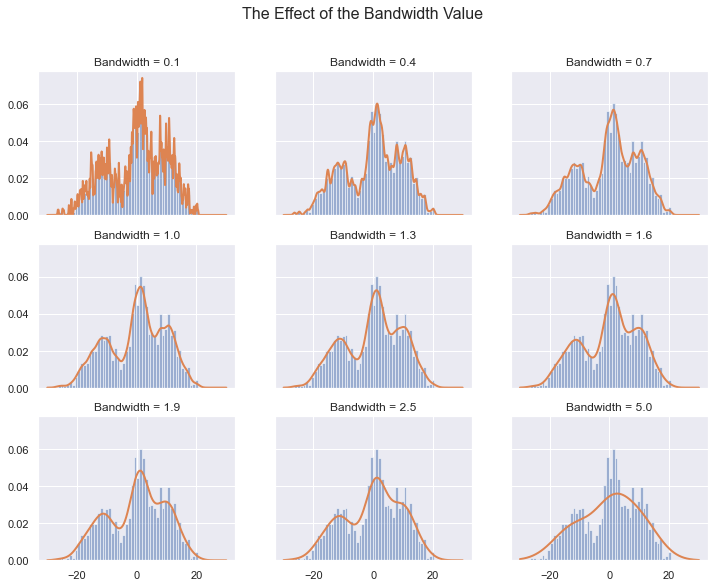

In [10]:
# for plotting:
# (row of plot, column of plot, bandwidth value)

position_bandwidth_vec = [
    (0, 0, 0.1), (0, 1, 0.4), (0, 2, 0.7), 
    (1, 0, 1.0), (1, 1, 1.3), (1, 2, 1.6), 
    (2, 0, 1.9), (2, 1, 2.5), (2, 2, 5.0)
]

# effect of bandwidth value plot

fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 9))
fig.suptitle('The Effect of the Bandwidth Value', fontsize=16)

for r, c, b in position_bandwidth_vec:
    kde = sklearn.neighbors.KernelDensity(bandwidth=b).fit(vals)
    log_density = kde.score_samples(x_vec)

    ax[r, c].hist(vals, bins=50, density=True, alpha=0.5)
    ax[r, c].plot(x_vec[:, 0], numpy.exp(log_density), '-', linewidth=2)
    ax[r, c].set_title('Bandwidth = {}'.format(b))
plt.show()

Observemos que, claramente, la curva de densidad estimada en el noveno sub-gráfico (donde el ancho de banda es 5) no se ajusta a los datos. A medida que aumentan los valores de ancho de banda, la densidad estimada se suaviza hasta que se ajusta notablemente a los datos. Visualmente, podemos decir que el valor del ancho de banda óptimo es cercano a 1,6.

Nuestro próximo paso es diseñar un algoritmo para identificar el ancho de banda óptimo, y así la densidad estimada es más precisa y por ende más fiable.


### Elección del Ancho de Banda Óptimo

En el ejercicio anterior, con el simple hecho de comparar visualmente varias densidades, podemos acercarnos mucho a la selección del ancho de banda óptimo. Sin embargo, este no es el método más eficiente para seleccionar valores de parámetros ni el más confiable.

Existen dos enfoques estándar para optimizar el valor del ancho de banda, y  a ambos los usaremos en futuros ejercicios y actividades. El primer enfoque se trata de un método plug-in (enfoque basado en fórmulas), que  es determinista  y no está optimizado en los datos de muestra. Los métodos plug-in son generalmente mucho más rápidos de implementar, más simples de codificar y más fáciles de explicar. Sin embargo, estos métodos tienen la gran desventaja de que su precisión tiende a sufrir en comparación con los enfoques que están optimizados en los datos de muestra. Estos métodos también hacen suposiciones en cuanto a sus distribuciones. La regla de Silverman y la regla de Scott  son los métodos plug-in más populares. Dado que la explicación de estas reglas requiere de un trabajo matemático complicado y de que no necesitamos comprender completamente la estimación de la densidad del kernel, vamos a omitir entrar en los detalles en este cuaderno. El paquete seaborn (que usaremos en futuros ejercicios) utiliza la regla de Scott de forma predeterminada como método para determinar el valor del ancho de banda.

El segundo enfoque, y posiblemente el más robusto para encontrar el ancho de banda óptimo, se trata de buscar una grilla predefinida de valores de ancho de banda. La búsqueda en grilla es un enfoque empírico usado frecuentemente en el aprendizaje automático y en el modelado predictivo para optimizar los hiperparámetros del modelo. Comenzamos definiendo la grilla de ancho de banda, que es simplemente la colección de valores de ancho de banda a ser evaluados. La grilla de ancho de banda se elige al azar. Usamos cada valor de ancho de banda en la grilla para crear una densidad estimada; luego, puntuamos la densidad estimada usando el valor de pseudo-log-verosimilitud. El valor de ancho de banda óptimo es aquel que tiene el valor máximo de pseudo-log-verosimilitud. Pensemos en el valor de pseudolog-verosimilitud como la probabilidad de obtener valor de los datos donde obtuvimos valor de los datos; y la probabilidad de no obtener valores donde no obtuvimos ningún valor de los datos. Idealmente, ambas probabilidades serían altas. 

Consideremos un caso donde la probabilidad de obtener valores de los datos donde obtuvimos valores es baja. En esta situación, la implicación sería que los valores de los datos en la muestra eran anómalos ya que bajo la verdadera distribución no se esperaría obtener valores donde los obtuvimos con alta probabilidad. El valor de pseudolog-verosimilitud es una métrica de evaluación que desempeña el mismo papel que la puntuación de precisión en los problemas de clasificación y el error cuadrático medio en los problemas de regresión.

Implementemos ahora el enfoque de búsqueda de grilla para optimizar el valor del ancho de banda.




In [11]:
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import sklearn.model_selection
import sklearn.neighbors

seaborn.set()



In [12]:
# creating bandwidth vector
# to be used in grid search

bandwidths = 10 ** numpy.linspace(-1, 1, 100)

In [13]:
# maximize the score
# score = pseudo-log-likelihood

# for time do 10-fold cv instead of leave-one-out

grid = sklearn.model_selection.GridSearchCV(
    estimator=sklearn.neighbors.KernelDensity(),
    param_grid={"bandwidth": bandwidths},
    cv=10 
)
grid.fit(vals)

GridSearchCV(cv=10, estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.30538555,
        0.319926...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])})

In [14]:
# optimal bandwidth value

best_bandwidth = grid.best_params_["bandwidth"]

print(
    "Best Bandwidth Value: {}"
    .format(best_bandwidth)
)

Best Bandwidth Value: 1.6297508346206444


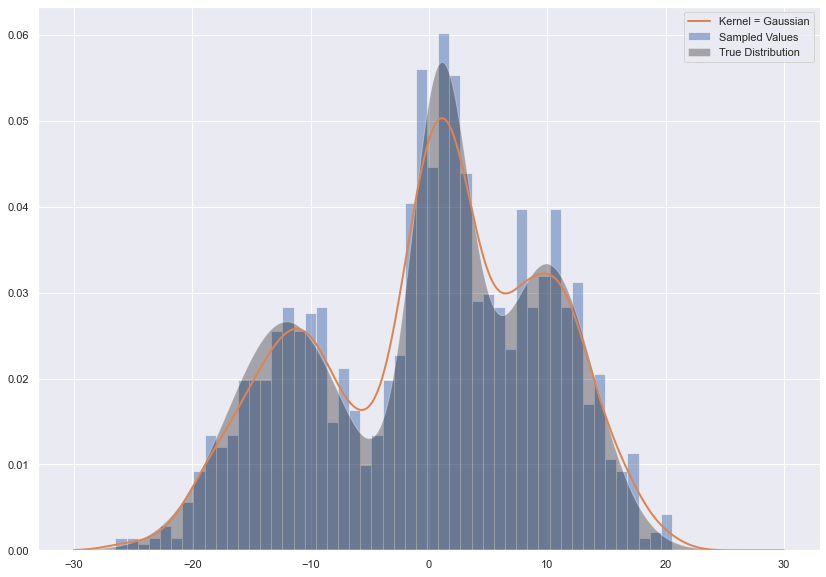

In [15]:
# histogram of random sample
# 1. true density
# 2. estimated density with optimal bandwidth

fig, ax = plt.subplots(figsize=(14, 10))

ax.hist(vals, bins=50, density=True, alpha=0.5, label='Sampled Values')
ax.fill(x_vec[:, 0], true_density, fc='black', alpha=0.3, label='True Distribution')

log_density = numpy.exp(grid.best_estimator_.score_samples(x_vec))
ax.plot(x_vec[:, 0], log_density, '-', linewidth=2, label='Kernel = Gaussian')

ax.legend(loc='upper right')
plt.show()

En este histograma, podemos ver cómo se superponen la densidad real y la  estimada óptima. La densidad estimada no está ni sobre ni insuficientemente ajustada en ningún grado perceptible y definitivamente captura los tres grupos. Podríamos decir que se ajusta mejor a la densidad real, pero esta es solo una densidad estimada generada por un modelo que está limitado por el conjunto de datos proporcionados.

Continuemos entonces con la segunda pregunta: ¿qué es la función del kernel y qué papel juega?



### Función de Kernel

El otro parámetro que queremos establecer es la función de kernel. El kernel es una función no negativa que controla la forma de la densidad. Al igual que los modelos temáticos, estamos trabajando en un entorno no negativo porque no tiene sentido tener verosimilitudes o probabilidades negativas. La función de kernel controla la forma de la densidad estimada, ponderando los puntos de forma sistemática. Esta metodología sistemática de ponderación es bastante simple. Los valores de los datos que están muy cerca de muchos otros valores de datos se ponderan hacia arriba, mientras que los valores de los datos que están solos o lejos de otros valores de datos se ponderan hacia abajo. Los valores de datos ponderados hacia arriba corresponderán a puntos de mayor probabilidad en la densidad final estimada.

Podemos usar muchas funciones como kernels, pero las seis opciones más frecuentes son Gaussiana, Tophat, Epanechnikov, Exponencial, Lineal y Coseno. Cada una de estas funciones representa una forma distribucional única. Tengamos en cuenta que en cada una de las fórmulas, el parámetro h, representa el valor del ancho de banda:

Gaussiana: cada observación tiene un peso en forma de campana:

\begin{align}
K\ \left(x;h\right)\propto\exp{-\ \left(\frac{x^2}{2h^2}\right)}\ 
\end{align}

Tophat: Cada observación tiene un peso de forma rectangular:

\begin{align}
K\ \left(x;h\right)\propto\left\{\begin{matrix}0\ if\ \left|x\right|\geq h\\\frac{1}{2h}\ if\ \left|x\right|<h\\\end{matrix}\right\}\ 
\end{align}

Epanechnikov: Cada observación tiene un peso en forma de montículo:

\begin{align}
K\ \left(x;h\right)\propto\ 1-\frac{x^2}{h^2}
\end{align}

Exponencial: Cada observación tiene un peso de forma triangular. Los lados del triangulo son cóncavos:

\begin{align}
K\ \left(x;h\right)\propto\exp{\left(-\frac{|h|}{h}\right)}
\end{align}

Lineal: Cada observación tiene un peso de forma triangular:

\begin{align}
K\ \left(x;h\right)\propto\left\{1-\ \begin{matrix}0\ if\ \left|x\right|\geq h\\\frac{x}{h}\ if\ \left|x\right|<h\\\end{matrix}\right\}\ 
\end{align}

Coseno: Cada observación tiene un peso en forma de montículo. Esta forma de montículo es más estrecha en la parte superior que el kernel de Epanechnikov:

\begin{align}
K\ \left(x;h\right)\propto\ \left\{1-\ \begin{matrix}0\ if\ \left|x\right|\geq h\\\cos{\frac{\pi x}{2h}}\ if\ \left|x\right|<h\\\end{matrix}\right\}
\end{align}

A continuación podemos ver las formas de distribución de las seis funciones del kernel:


EJERCICIO 9.03:  EL EFECTO DE LA FUNCION DE KERNEL

Demostraremos cómo la elección de la función de kernel afecta la calidad de la estimación de la densidad. Al igual que como hicimos cuando exploramos el efecto del valor del ancho de banda, mantendremos todos los demás parámetros constantes, usaremos los mismos datos generados en los dos primeros ejercicios y ejecutaremos seis modelos diferentes de estimación de la densidad del kernel usando las seis funciones del kernel especificadas anteriormente. Deben notarse diferencias claras entre las seis densidades estimadas, pero estas diferencias deben ser un poco menos dramáticas que las diferencias entre las densidades estimadas utilizando los diferentes valores de ancho de banda.



1. Definamos una lista de tuplas en la misma línea que la que definimos anteriormente. Cada tupla incluye los índices de fila y columna del sub-gráfico y la función de kernel que usaremos para crear la estimación de densidad:




In [16]:
# for plotting:
# (row of plot, column of plot, kernel function)

position_kernel_vec = [
    (0, 0, 'gaussian'), (0, 1, 'tophat'), 
    (1, 0, 'epanechnikov'), (1, 1, 'exponential'), 
    (2, 0, 'linear'), (2, 1, 'cosine'), 
]

2. Ajustemos y representemos gráficamente seis modelos de estimación de densidad de kernel usando una función de kernel diferente para cada uno. Para comprender realmente las diferencias entre las funciones de kernel, estableceremos el valor del ancho de banda en el valor de ancho de banda óptimo que se encuentra en el Ejercicio 9.02, Selección del ancho de banda óptimo mediante la búsqueda en grilla y no lo ajustaremos:



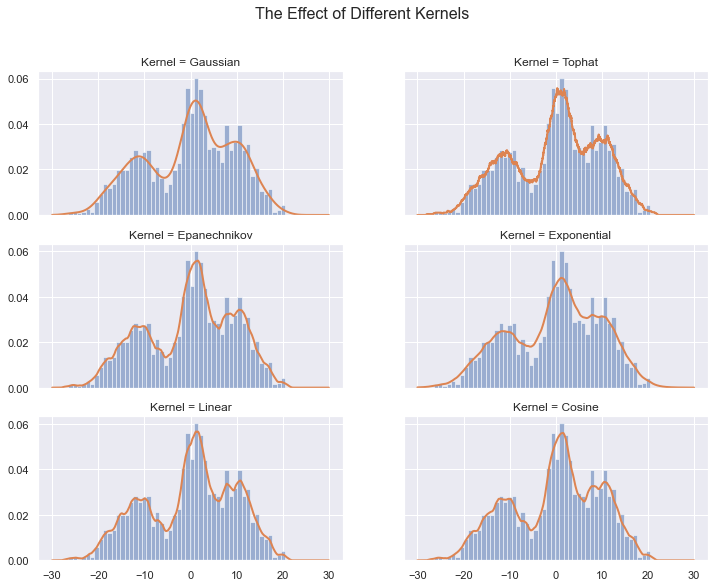

In [17]:
# effect of kernel function plot

fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(12, 9))
fig.suptitle('The Effect of Different Kernels', fontsize=16)

for r, c, k in position_kernel_vec:
    kde = sklearn.neighbors.KernelDensity(
        kernel=k, 
        bandwidth=best_bandwidth
    ).fit(vals)
    log_density = kde.score_samples(x_vec)

    ax[r, c].hist(vals, bins=50, density=True, alpha=0.5)
    ax[r, c].plot(x_vec[:, 0], numpy.exp(log_density), '-', linewidth=2)
    ax[r, c].set_title('Kernel = {}'.format(k.capitalize()))
plt.show()

## Análisis de Puntos Calientes.

# Referencias

- Cottam, J., Lumsdaine, A., & Wang, P. (2014). Abstract rendering: Out-of-core rendering for information visualization. Proceedings of SPIE - The International Society for Optical Engineering. 9017. 90170K. 10.1117/12.2041200

- Jones, Aaron; Kruger, Christopher; Johnston, Benjamin. The Unsupervised Learning Workshop: Get started with unsupervised learning algorithms and simplify your unorganized data to help make future predictions. Packt Publishing. Kindle Edition. 

- Rey, S., & Arribas-Bel, D. (nd). Introduction Geographic Data Science with PySAL and the pydata stack
